In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 100

<!-- 
---
jupyter:
  jupytext:
    text_representation:
      extension: .md
      format_name: markdown
      format_version: '1.0'
      jupytext_version: 0.8.6
  kernelspec:
    display_name: Python 3
    language: python
    name: python3
---

In [3]:
import pandas

from matplotlib import pyplot
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad
import plotly.offline as py
import plotly.graph_objs as go



-->

# Lecture 8: The Lindblad Master Equation

!!! summary "Learning goals"

    After this lecture you will be able to:

    - Do cool things
    
    
In this lecture, we will introduce a tool for calculating the average evolution of a system while it is being continuously measured.  In particular, it will allow us calculate the resulting density matrix for the case that we do not know the measurement outcome!  Of course, if we start with a pure state, as these measurements occur, we will lose information about our state, and its purity will decrease (with some exceptions).

We will not derive the Lindblad equation here, but some intuition will be provided.

When we measure some some system, label it $A$, we let it interact with a measurement apparatus, label it $B$, such that we can extract information about the state of $A$ via $B$.  Once we have extracted this information from $B$ with sufficient accuracy, we collapse the state of $A$.

![](figures/8/hint.PNG){style="width:300px"}

The interaction between the system $A$ and apparatus $B$ leads to entanglement between the two, and to properly describe them, we need a joint density matrix $\rho_{AB}$ that describes the combined system $A+B$.

Let's assume we measure $B$ but lose track of the outcome, how could we then write down an accurate density matrix for the system $A$?  Put more directly, how can we obtain $\rho_A$ from $\rho_{AB}$?  One way, mentioned last time, is to average over all possible outcomes, including collapses at all possible times, which is the Monte Carlo Wave Function (MCWF) method.

Another method is to take the "partial trace" of the joint density matrix to obtain an effective description of $A$ as an average response to the (unknown) measurement.  This is denoted as follows

$$
\rho_A = Tr_B (\rho_{AB})
$$

and, from this, the Lindblad equation can be derived (with some skipped steps):

$$
\frac{\partial \rho}{\partial t} = \frac{-i}{\hbar} [\hat{H}(t), \rho(t)] + \sum_n \frac{1}{2} [2 \hat{C}_n \rho(t) \hat{C}_n^\dagger - \rho(t) \hat{C}_n^\dagger \hat{C}_n - \hat{C}_n^\dagger \hat{C}_n \rho(t)]
$$

The first part should be familiar -- it is just the time-dependent Schrodinger equation, which describes the coherent evolution in the absence of measurement.  The second term is known as the Liouvillian, and appears to be more complicated.  

- $\hat{C}_n$ is a collapse operator
- These operators have units of $1/\sqrt{t}$, i.e. $\sqrt{\text{rate}}$
- After a "quantum jump", the state of $A$ collapses onto an eigenstate of $\hat{C}_n$, which are related to our observables

For a concrete example, we may measure the position of a harmonic oscillator with an average rate of $\gamma$ "measurements" per second.  Since we are measuring only one quantity, $n=1$, so the single collapse operator takes the form

$$
\hat{C}_1 = \sqrt{\gamma} (a^\dagger + a)
$$

We could also consider a spin-1/2 particle in a magnetic field oriented in the $Z$-direction, giving the Hamiltonian

$$
\begin{align}
H &= g_S \mu_B \vec{S} \cdot \vec{B}_0\\
&= \frac{\hbar \omega_L}{2} \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} 
\end{align}
$$

We will measure photons emitted by a spin in the state $|\uparrow\rangle$, which is similar to how magneto-resonance imaging (MRI) works.  Since the up state can only decay to the ground state, and the ground state can't decay any further, we can use the spin-lowering operator as our collapse operator:

$$
\hat{C} = \hat{S}_{-} = \hbar \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix}
$$

If "guessing" the collapse operator in this way is unsatisfying, then we can try to be more detailed in the following way.

![](figures/8/mutualm.PNG){style="width:500px"}

We can imagine two LC circuits that are weakly coupled, where one of them models a spin oscillating in a magnetic field, and the other represents the bath into which photons are emitted by the spin when it decays.  The energy of the system is

$$
E = \frac{1}{2} L_1 I_1^2 + \frac{1}{2} L_2 I_2^2 + M I_1 I_2 
$$

where the last term represents the weak coupling via a mutual inductance.

$$
I_1 I_2 = (a^\dagger + a)(b^\dagger + b) = a^\dagger b^\dagger + a^\dagger b + a b^\dagger + ab
$$

The $a$ operators correspond to the spin system, and the $b$ operators to the photon system.  Analyzing the terms:

- $a^\dagger b^\dagger$ creates excitations in both systems and violates energy conservation (technically, this term is "fast rotating" and averages out in certain approximations)

- $a^\dagger b$ does nothing if we are in a dark room, i.e. we assume the photon bath begins empty (in its ground state)

- $ab$ has the same issue as the first term, so we neglect it as well

- $a b^\dagger$ represents the transfer of 1 quantum of energy (a photon) from the spin to the bath (decay), so this is the process we are interested in

This picture also gives us a method of estimating the rate of the collapse operator, from the strength of the mutual inductance coupling.  (For reference, a timescale of 8 hours has been observed in *Nature Materials* **17** 313 (2018), but spins typically decay much more quickly)

Returning to our problem, we assume the spin starts out in $|\uparrow\rangle$, so we can write down $\rho(t=0)$ and $C$ (dropping the "hat" for brevity)

$$
\begin{align}
\rho(t=0) &= \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}\\
C &= \sqrt{\gamma} \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix}
\end{align}
$$

We can then compute all of the terms needed to form the Lindbladian:

$$
\begin{align}
\rho &= \begin{bmatrix} \rho_{11} & \rho_{12} \\ \rho_{21} & \rho_{22} \end{bmatrix}\\
\rho C^\dagger &= \begin{bmatrix} 0 & \rho_{11} \\ 0 & \rho_{21} \end{bmatrix}\\
C \rho C^\dagger &= \begin{bmatrix} 0 & 0 \\ 0 & \rho_{11} \end{bmatrix}\\
C^\dagger C &= \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}\\
\rho C^\dagger C &= \begin{bmatrix} \rho_{11} & 0 \\ \rho_{21} & 0 \end{bmatrix}\\
C^\dagger C \rho &= \begin{bmatrix} \rho_{11} & \rho_{12} \\ 0 & 0 \end{bmatrix}\\
\hat{\mathcal{L}} &= \gamma \begin{bmatrix} -\rho_{11} & -\frac{\rho_{12}}{2} \\ -\frac{\rho_{21}}{2} & \rho_{11} \end{bmatrix}
\end{align}
$$

which allows us to form a matrix of differential equations to solve for the time evolution of $\rho$:

$$
\begin{align}
\begin{bmatrix} \dot{\rho_{11}} & \dot{\rho_{12}} \\ \dot{\rho_{21}} & \dot{\rho_{22}} \end{bmatrix}
 = \frac{-i \omega_L}{2} \begin{bmatrix} 0 & 2\rho_{12} \\ -2\rho_{21} & 0 \end{bmatrix} + \gamma \begin{bmatrix} -\rho_{11} & -\frac{\rho_{12}}{2} \\ -\frac{\rho_{21}}{2} & \rho_{11} \end{bmatrix}
\end{align}
$$

Writing out the equations explicity:

$$
\begin{align}
\dot{\rho_{11}} &= -\gamma \rho_{11}\\ 
\dot{\rho_{22}} &= \gamma \rho_{11}\\
\dot{\rho_{12}} &= -i\omega_L \rho_{12} - \gamma \rho_{12}/2\\
\dot{\rho_{21}} &= i\omega_L \rho_{21} - \gamma \rho_{21}/2
\end{align}
$$

The boundary conditions for these differential equations are that only $\rho_{11} (t=0) = 1$, with the other three elements equal to $0$ at $t=0$.  The solutions are

$$
\begin{align}
\rho_{11} (t) &= e^{-\gamma t}\\
\rho_{12} (t) &= 0\\
\rho_{21} (t) &= 0\\
\rho_{22} (t) &= 1-e^{-\gamma t}
\end{align}
$$

So the population in the excited state exponentially decays to the ground state.  What if we had started with a superposition?  Then, the off-diagonal terms (the coherences) of the initial density matrix would not be 0, and their differential equations would also have decaying solutions.  Interestingly, the factor of $\frac{1}{2}$ in the Lindbladian's coherences would cause the initial coherences to decay with a rate $1/T_2 = 1/2T_1$, where $T_1$ is the average time for the initial population to decay.  This means that even in the absence of a pure dephasing effect, energy relaxation alone sets an upper limit on the longevity of coherences in initial superposition states.

## Decay of a spin with the Lindblad master equation

Now, we will use QuTiP to solve the problem discussed above: the decay of a spin due to the emission of a photon. 

### Setting up the problem

We will first create initial state in the 2-dimensional Hilbert space. 

Note that `basis(N,0)` is completely identical to the function `fock(N,0)` we used earlier. We use this one here just because it is (maybe) strange to call the levels of a spin "Fock" states.

In the last line, we will print out the state we created to make sure it is what we think it is.

In [4]:
N = 2
psi0 = basis(N,0)
psi0 = psi0.unit()
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Now, we need an operator with the following matrix for our "collapse" opeartor, which is the 

$$
\hat \sigma_{-} = 
\begin{pmatrix}
0 & 0 \\
1 & 0 
\end{pmatrix}
$$

This is identical to the "creation" operator, as it turns out, for the harmonic oscillator (HO). (This is because spin-up has higher energy but it is the first row of the basis state, whereas the first row for the HO is the ground state.). 

But, again, it would be confusing to write code for a spin that uses HO operators. Fortunately, QuTiP has a built-in functions to generate the Pauli matrices:

http://qutip.org/docs/latest/apidoc/functions.html#qutip.operators.sigmam

We will use `sigmam()` to make the annihilation operator:

In [5]:
sig_m = sigmam()
sig_m

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]

And, we can double-check that it does what we think it should: 

$$
\hat \sigma_- \left| \uparrow \right\rangle = \left| \downarrow \right\rangle
$$

In [6]:
sig_m*psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

Good, this is indeed what we expect! 

Now, we need the Hamiltonian. For the Hamiltonian, we will pick just the $\sigma_z$ operator:

$$
\hat H = \tfrac{1}{2} \hat \sigma_z
$$

In [7]:
H = 0.5 * sigmaz()
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5  0. ]
 [ 0.  -0.5]]

This implicitly means that we are choosing a Larmor frequency:

$$
\omega_L = \frac{1}{\hbar} = 2\pi \times \frac{1}{h} = 2\pi \times 1.5 \times 10^{33}\  {\rm Hz}
$$

The may seem mega-fast ($10^{33}$ Hz), and it is! It turns out, however, that when QuTiP solves time-dependent Hamiltonians, it rescales the time-variables in the problem such that $\hbar = 1$. Our  choice of $\hat H  = \frac{1}{2}\hat \sigma_z$ leads to an angular Larmor frequency of:

$$
\omega_L = 1\ {\rm rad / sec} = 0.15\ {\rm Hz}
$$

in "QuTiP" variables. This is not a big deal: it just changes the rescaling of the time axis of any plots. But one should be careful to remember what the time axis means when performing a simulation. 

Even more convenient for plotting, though, is to choose $\omega_L = 2\pi$ so that the oscillations we will see, for example in $S_x$ for a superposition state will have a period of 1 second (1 time unit):

In [8]:
w = 1 * 2 * np.pi 
H = 0.5 * w * sigmaz()

### Solving the master equation

We now have everything we need to solve the (Lindblad) master equation!

http://qutip.org/docs/latest/guide/dynamics/dynamics-master.html

To do this, we need to use the qutip function `mesolve()`: 

http://qutip.org/docs/latest/apidoc/functions.html#module-qutip.mesolve

For QuTiP to solve the master equation, we need to give it a few thigns:

* `H`: the Hamiltonian
* `psi0`: the quantum state at $t=0$ (density matrix or wave function)
* `t`: A list of times for which you would like the solution
* `c_ops`: A python "list" of collapse operators

For our collapse operator, we will need to scale the $\sigma_-$ operator by $\sqrt{\gamma}$, where $\gamma$ is the average rate that the collapse is applied (the average number of collapses that occur per second):

$$
\hat C = \sqrt{\gamma}\ \hat \sigma_-
$$

Like $\omega_L$, the rate $\gamma$ has the units equivalent to 1 / second. If we choose $\gamma = 2\pi \times 0.1 $, then with our choice of $\hat H = \frac{1}{2} \hat \sigma_z$, how many oscillations will we see in $\sigma_x$ for exmaple if we started with $|x+\rangle$? For a function $f(x) = e^{-\gamma t/2} \cos(\omega_t)$, we would then observe $10/(2\pi) = 1.59$ oscillations by the time the amplitude decays by $1/e$. 

Since we are performing only one measurement, we all we have to do is put this operator in square brackets to create our `c_ops` python list:

In [9]:
gamma = 0.1 * w
c_ops = [np.sqrt(gamma) * sig_m]

Now, we need to create the time array at which we want QuTiP to give us the solution of the master equation:

In [10]:
t = np.linspace(0, 10, 401) 

And then we can just call `mesolve()`:

In [11]:
result = mesolve(H, psi0, t, c_ops)

Finally, we will use the projection operator to extract values of the density matrix to plot:

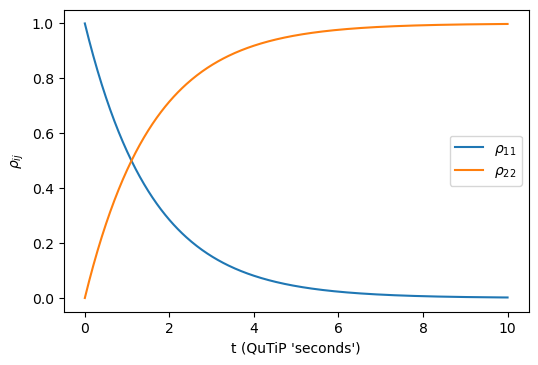

In [12]:
plt.plot(t,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
plt.plot(t,expect(result.states, projection(2,1,1)), label=r'$\rho_{22}$');
plt.ylabel(r"$\rho_{ij}$")
plt.xlabel("t (QuTiP 'seconds')")
plt.legend()
plt.show()

In [13]:
result = mesolve(H, psi0, t, c_ops)